In [39]:
import pandas
import os
import h5py
from tqdm import tqdm
import torch
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from torch.hub import download_url_to_file

In [13]:
file = "download_metadata.csv"
experiment = pandas.read_csv(file)
print(experiment.head(3))

         PDE                        Filename  \
0  Advection  1D_Advection_Sols_beta0.1.hdf5   
1  Advection  1D_Advection_Sols_beta0.2.hdf5   
2  Advection  1D_Advection_Sols_beta0.4.hdf5   

                                                 URL                 Path  \
0  https://darus.uni-stuttgart.de/api/access/data...  1D/Advection/Train/   
1  https://darus.uni-stuttgart.de/api/access/data...  1D/Advection/Train/   
2  https://darus.uni-stuttgart.de/api/access/data...  1D/Advection/Train/   

                                MD5  
0  183cd9b7a6c3c5caf0fd89c87f2c4a80  
1  e6b6997e00bc0310308ce14df12fecd4  
2  99d57a5a8d660ba2cb824f41e09c6543  


This is rbc_data download link which was used by https://github.com/Rose-STL-Lab/Turbulent-Flow-Net
Link download: https://drive.google.com/drive/folders/1VOtLjfAkCWJePiacoDxC-nrgCREKvrpE

TypeError: Invalid shape (1024,) for image data

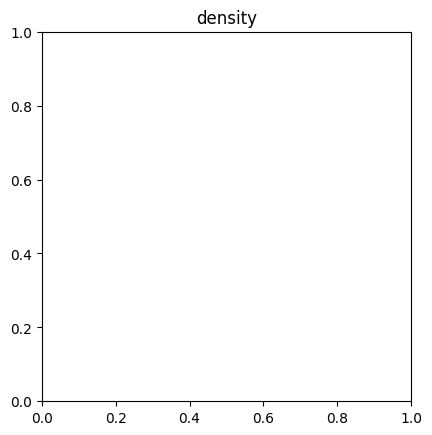

In [34]:
rbc_data = r"2D\CFD\Turbulent_Flow\rbc_data.pt"

This is the Navier Stokes Incompressible flow which is created by PDEBench and uploaded to https://darus.uni-stuttgart.de/dataset.xhtml?persistentId=doi%3A10.18419%2Fdarus-2986
Note that for some reasons, the file "ns_incom_inhom_2d_512-4.h5" has gone missing?

In [81]:
NS_experiment = [f"ns_incom_inhom_2d_512-{i}.h5" for i in range(5)]
print(NS_experiment)
for i in range(len(experiment)):
    if experiment['Filename'][i] in NS_experiment and not os.path.exists(experiment['Path'][i] + experiment['Filename'][i]):
        print(i, experiment['Filename'][i])
        download_url_to_file(experiment['URL'][i], experiment['Path'][i] + experiment['Filename'][i])

['ns_incom_inhom_2d_512-0.h5', 'ns_incom_inhom_2d_512-1.h5', 'ns_incom_inhom_2d_512-2.h5', 'ns_incom_inhom_2d_512-3.h5', 'ns_incom_inhom_2d_512-4.h5']
117 ns_incom_inhom_2d_512-1.h5


100%|██████████| 9.26G/9.26G [26:49<00:00, 6.18MB/s]   


228 ns_incom_inhom_2d_512-2.h5


100%|██████████| 9.29G/9.29G [17:00<00:00, 9.77MB/s]  


289 ns_incom_inhom_2d_512-3.h5


100%|██████████| 9.27G/9.27G [16:13<00:00, 10.2MB/s]  


In [36]:
ns_file = r"2D\NS_incom\ns_incom_inhom_2d_512-0.h5"
ns_data = h5py.File(ns_file)

['force', 'particles', 't', 'velocity']
(4, 1000, 512, 512, 2)


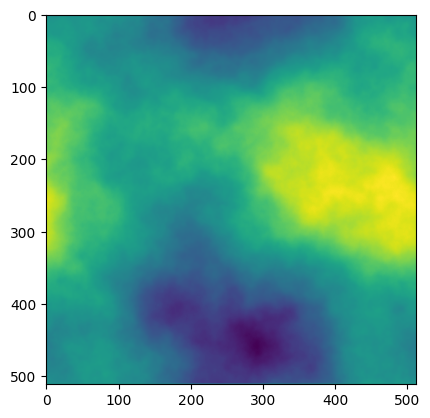

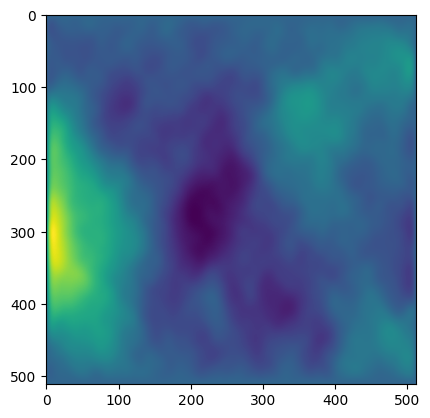

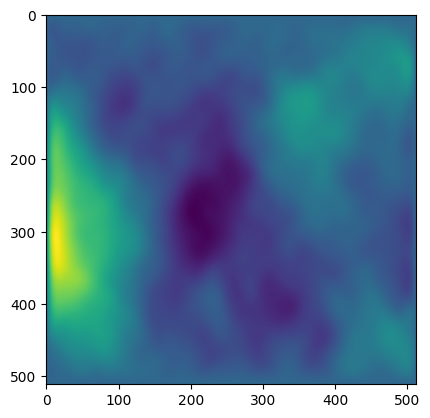

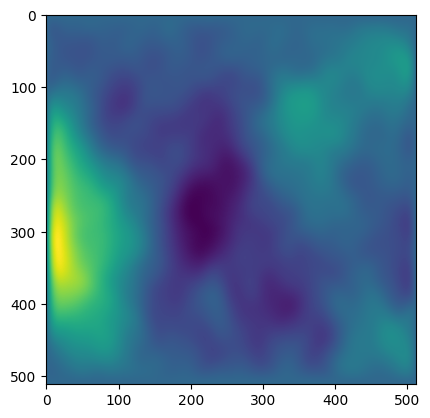

In [79]:
for f in [ns_data]:
    group_keys = list(f.keys())
        
    print(group_keys) 
    """ 
        ['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
    """

    print(f[group_keys[3]].shape) # (number of testdata, number of frame, image: 2D array) 
    for i in range(4):
        plt.imshow(f[group_keys[3]][0][i][:512, :512, :1])
        plt.show()

2D CFD experiments from PDE Bench, because we already has rbc_data for turbulent flow, we try some different experiments.

In [26]:
CFD2D_experiment = ["OTVortex.hdf5", "KH_M04_dk1_Re1e3.hdf5", "2D_shock.hdf5"]
print(CFD2D_experiment)
for i in range(len(experiment)):
    if experiment['Filename'][i] in CFD2D_experiment and not os.path.exists(experiment['Path'][i] + experiment['Filename'][i]):
        print(i, experiment['Filename'][i])
        download_url_to_file(experiment['URL'][i], experiment['Path'][i] + experiment['Filename'][i])


['OTVortex.hdf5', 'KH_M04_dk1_Re1e3.hdf5', '2D_shock.hdf5']
101 2D_shock.hdf5


100%|██████████| 3.16G/3.16G [06:23<00:00, 8.84MB/s]   


107 KH_M04_dk1_Re1e3.hdf5


100%|██████████| 1.59G/1.59G [02:39<00:00, 10.7MB/s] 


109 OTVortex.hdf5


100%|██████████| 3.16G/3.16G [05:53<00:00, 9.58MB/s]   


In [35]:
shock_file = r"2D\CFD\Test\2DShock\2D_shock.hdf5"
KH_file = r"2D\CFD\Test\KH\KH_M04_dk1_Re1e3.hdf5"
TOV_file = r"2D\CFD\Test\TOV\OTVortex.hdf5" 

shock_data = h5py.File(shock_file, 'r') 
KH_data = h5py.File(KH_file, 'r')
TOV_data = h5py.File(TOV_file, 'r')

['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
(101, 1024, 1024)


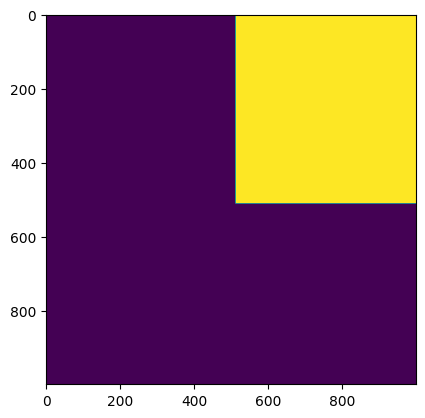

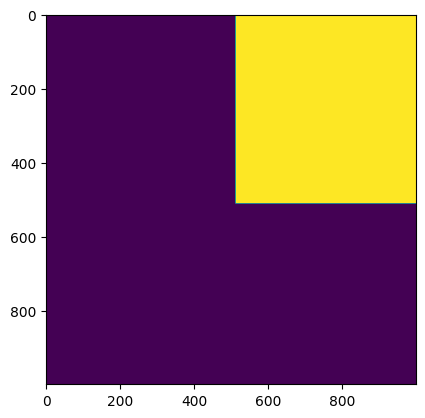

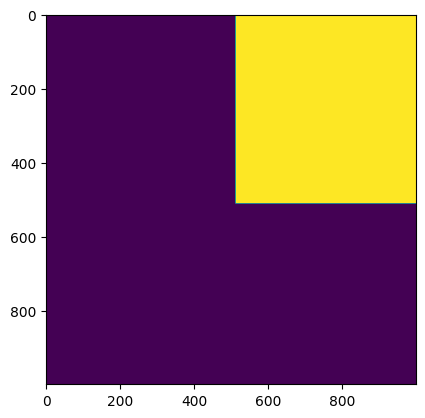

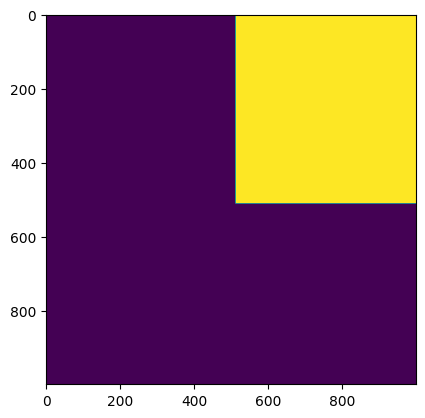

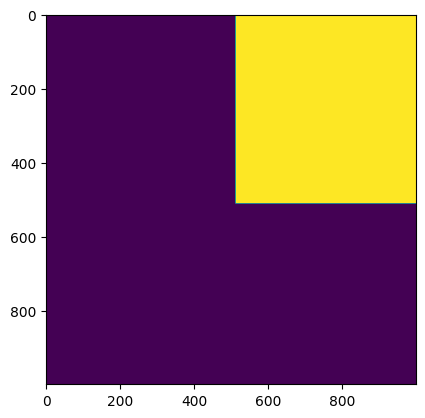

['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
(51, 1024, 1024)


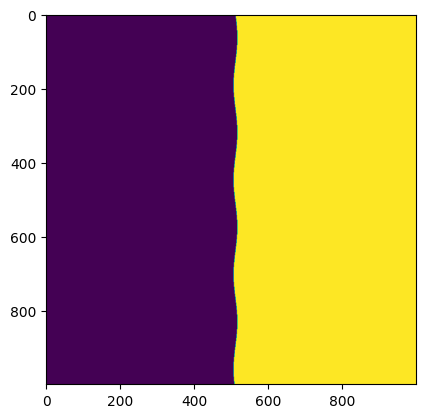

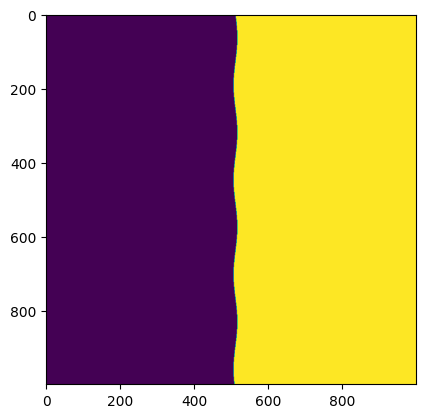

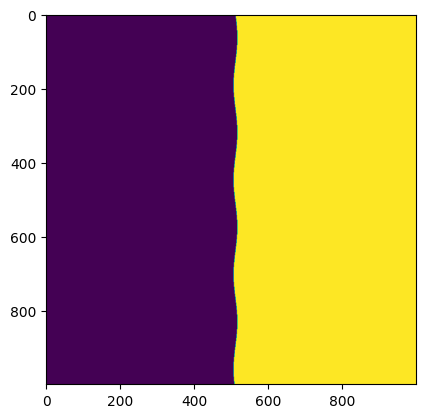

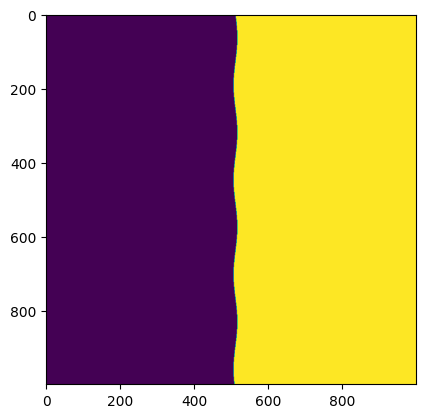

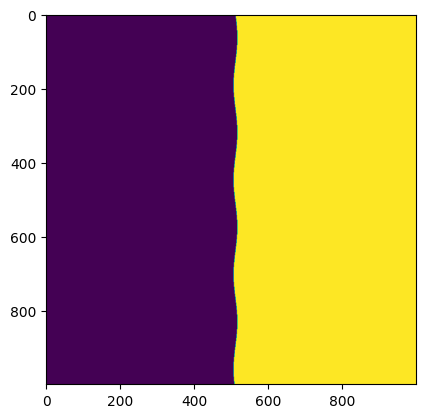

['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
(101, 1024, 1024)


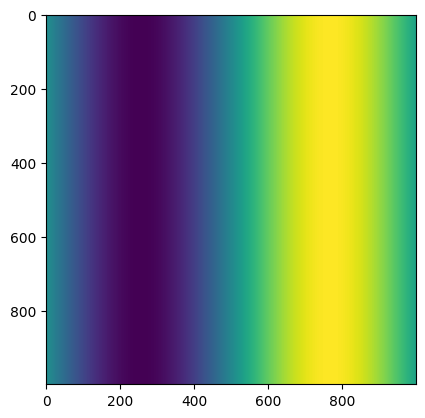

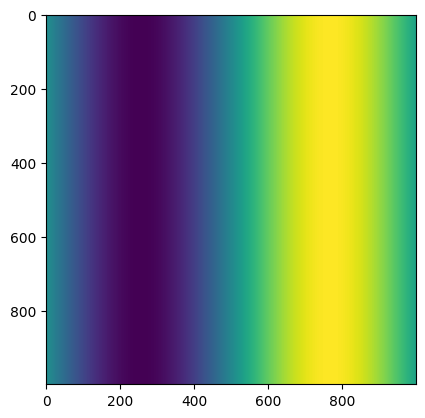

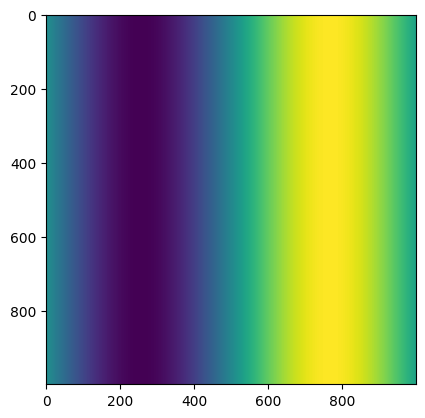

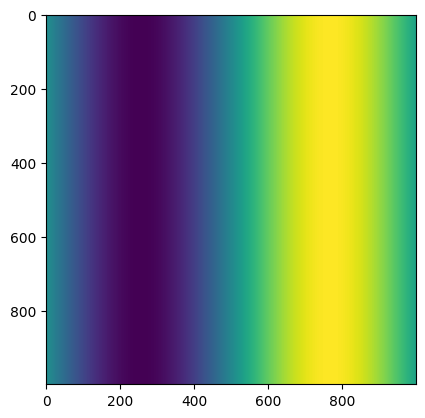

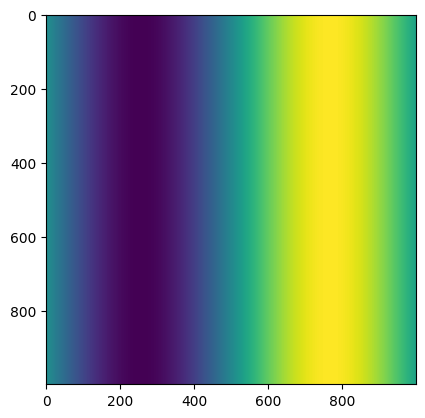

In [72]:
print(list(shock_data.keys()))
print(list(KH_data.keys()))
print(list(TOV_data.keys()))

for f in [shock_data, KH_data, TOV_data]:
    group_keys = list(f.keys())
        
    print(group_keys) 
    """ 
        ['Vx', 'Vy', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate']
    """

    print(f[group_keys[0]].shape) # (number of testdata, number of frame, image: 2D array) 
    for i in range(5):
        plt.imshow(f[group_keys[0]][0][:1000, :1000])
        plt.show()

    # Tensor: (Number of consecutive frame, channel, image: 2D array)